<a href="https://colab.research.google.com/github/tirmir/dbscan/blob/main/Dbscan_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import queue 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.express as px
from scipy.spatial import distance
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv("Mall_Customers.csv", index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
for i in range(len(df.columns)):
  name = df.columns[i]
  print(df[name].value_counts().head(7))
  print(" ")

0    112
1     88
Name: Gender, dtype: int64
 
32    11
35     9
19     8
31     8
30     7
49     7
27     6
Name: Age, dtype: int64
 
54    12
78    12
60     6
87     6
62     6
63     6
71     6
Name: Annual Income (k$), dtype: int64
 
42    8
55    7
46    6
73    6
35    5
52    5
59    5
Name: Spending Score (1-100), dtype: int64
 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df.Gender = en.fit_transform(df.Gender)
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

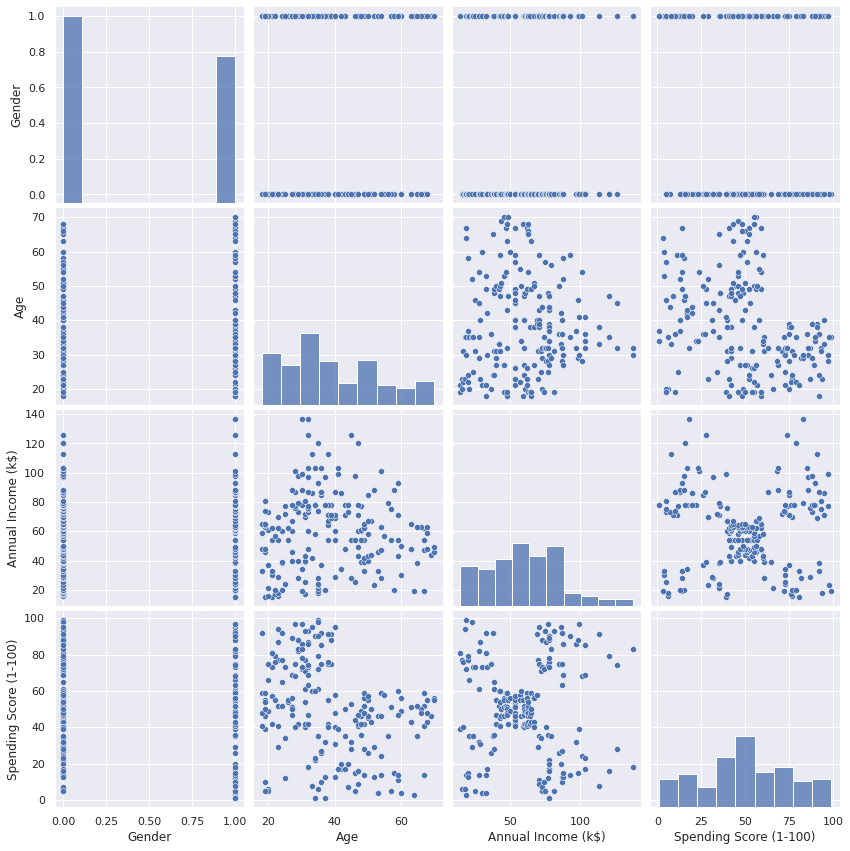

In [ ]:
sns.pairplot(df, vars= ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], height = 3)

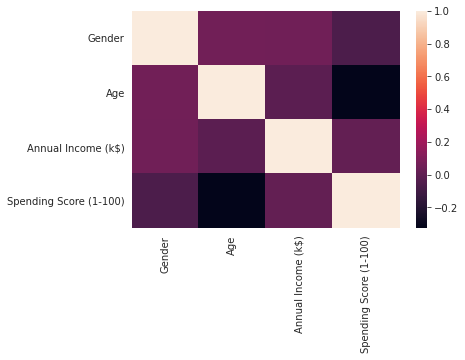

In [ ]:
sns.heatmap(df.corr())

In [ ]:
fig = px.scatter_3d(df, x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'], 
                 opacity=1, color_discrete_sequence=['black'], height=900, width=900)

fig.show()

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
class CustomDBSCAN:
      def __init__(self):
        self.core = -2
        self.border = -3

      def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
            if np.linalg.norm(data[i]-data[pointId]) <= epsilon:
                points.append(i)
        return points

      def fit(self, data, Eps, MinPt):
        point_label = [-1] * len(data)
        point_count = []

        core = []
        border = []

        for i in range(len(data)):
            point_count.append(self.neighbour_points(data, i, Eps))

        for i in range(len(point_count)):
            if (len(point_count[i]) >= MinPt):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)

        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # clustering
        cluster = 1

        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  

        return point_label, cluster

        plt.show()

In [ ]:
mod = CustomDBSCAN()
point_labels, clusters = mod.fit(X_scaled, 0.06,6)
df['custom_levels'] = point_labels
np.array(point_labels)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,
       -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:

# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'],
                    opacity=1, color=df['custom_levels'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    width=900, height=900, 
                   )

fig.show()

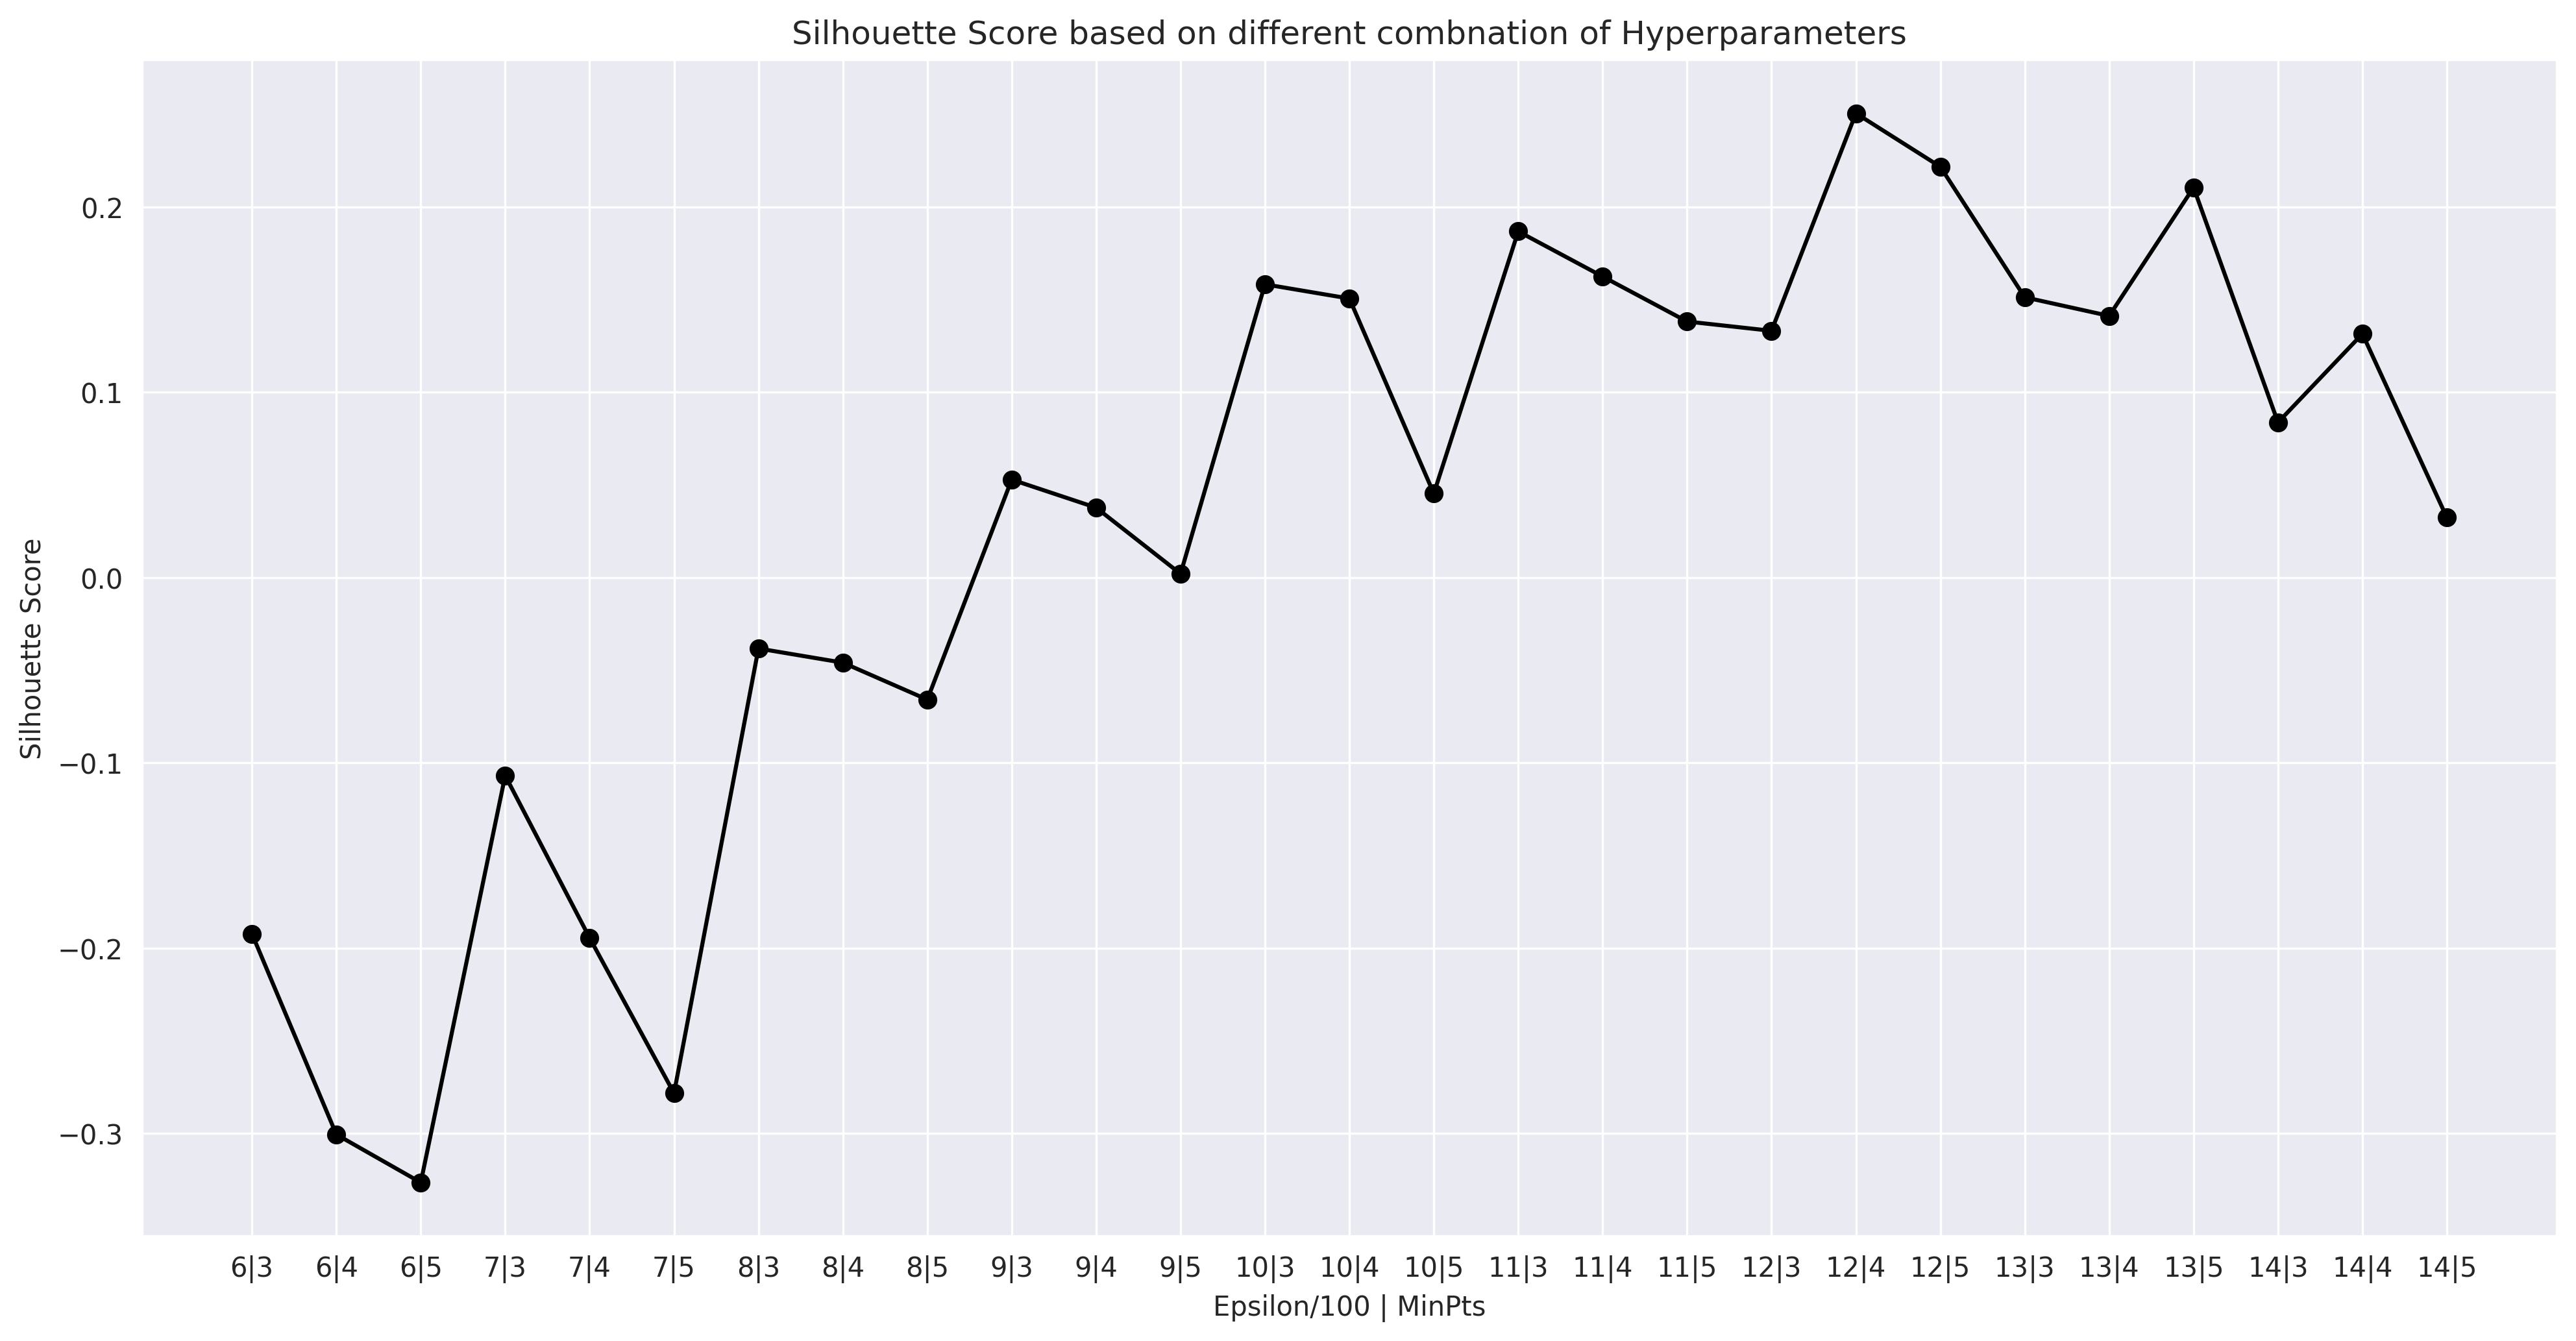

[-0.19227425228248884, -0.3005997370056578, -0.32651455274405783, -0.10690196252619233, -0.19449885854942578, -0.27832161444392794, -0.03828779396981072, -0.045929781233375475, -0.06588014269689411, 0.052870888465439865, 0.03772611991082143, 0.0020121519249932927, 0.15827402493473017, 0.15059761879205907, 0.04535562391226983, 0.1868551471611166, 0.16248074240178398, 0.13819842044931113, 0.13318372367997455, 0.250594690149877, 0.2217283495142961, 0.1512783882976851, 0.14123101089068352, 0.21055540848891752, 0.08373965808622674, 0.13153984903530164, 0.032433894690060534]


In [ ]:
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(6,15) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,6)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        mod = CustomDBSCAN()
        pointLabel, cluster = mod.fit(X_scaled, k/100,j)
        shilLabel = np.array(np.array(pointLabel))
        # Calculate Silhoutte Score and append to a list
        S.append( metrics.silhouette_score(X_scaled,shilLabel,metric= 'euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph
%matplotlib inline
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()
print(S)

In [ ]:
mod = CustomDBSCAN()
point_labels, clusters = mod.fit(X_scaled, 0.12,4)
df['custom_levels'] = point_labels

In [ ]:

# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'], 
                    opacity=1, color=df['custom_levels'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    width=900, height=900, 
                   )

fig.show()

In [ ]:
Y = df[[ 'Annual Income (k$)', 'Spending Score (1-100)']]
Y_scaled = scaler.fit_transform(Y)

In [ ]:
models = CustomDBSCAN()
point_label, cluster = models.fit(Y_scaled, 0.08,4)
shilLevel = np.array(np.array(point_label))
df['custom_2DLevels'] = point_label


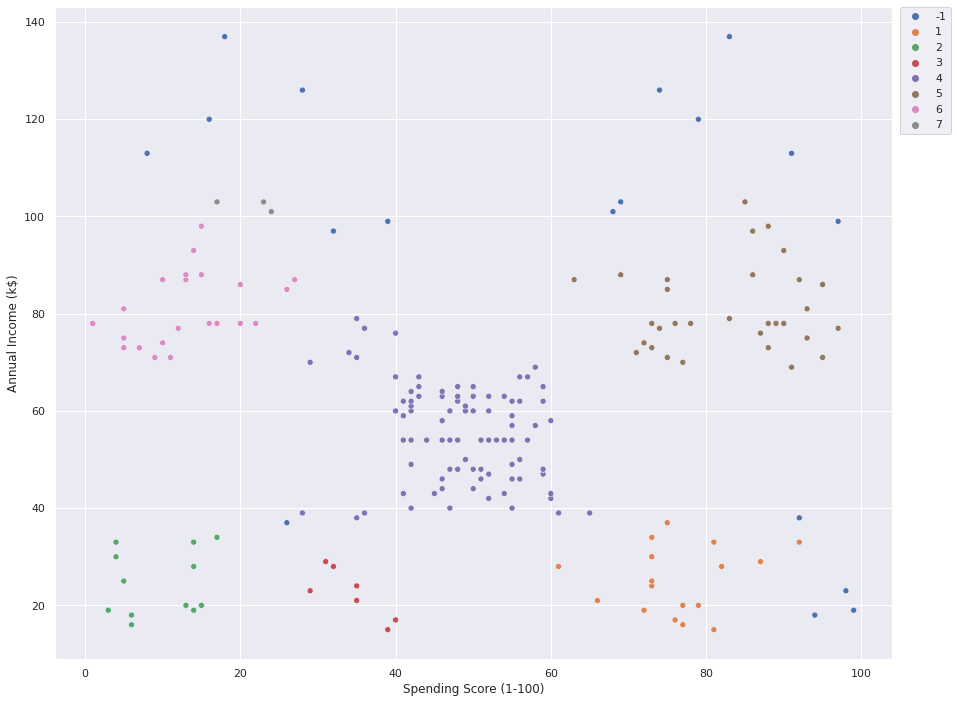

In [ ]:

sns.scatterplot(data=df, x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue = df['custom_2DLevels'], palette="deep")

# Move legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

In [ ]:
silhouette_score = metrics.silhouette_score(Y_scaled,shilLevel,metric= 'euclidean')

In [ ]:
silhouette_score

0.42005758345270733

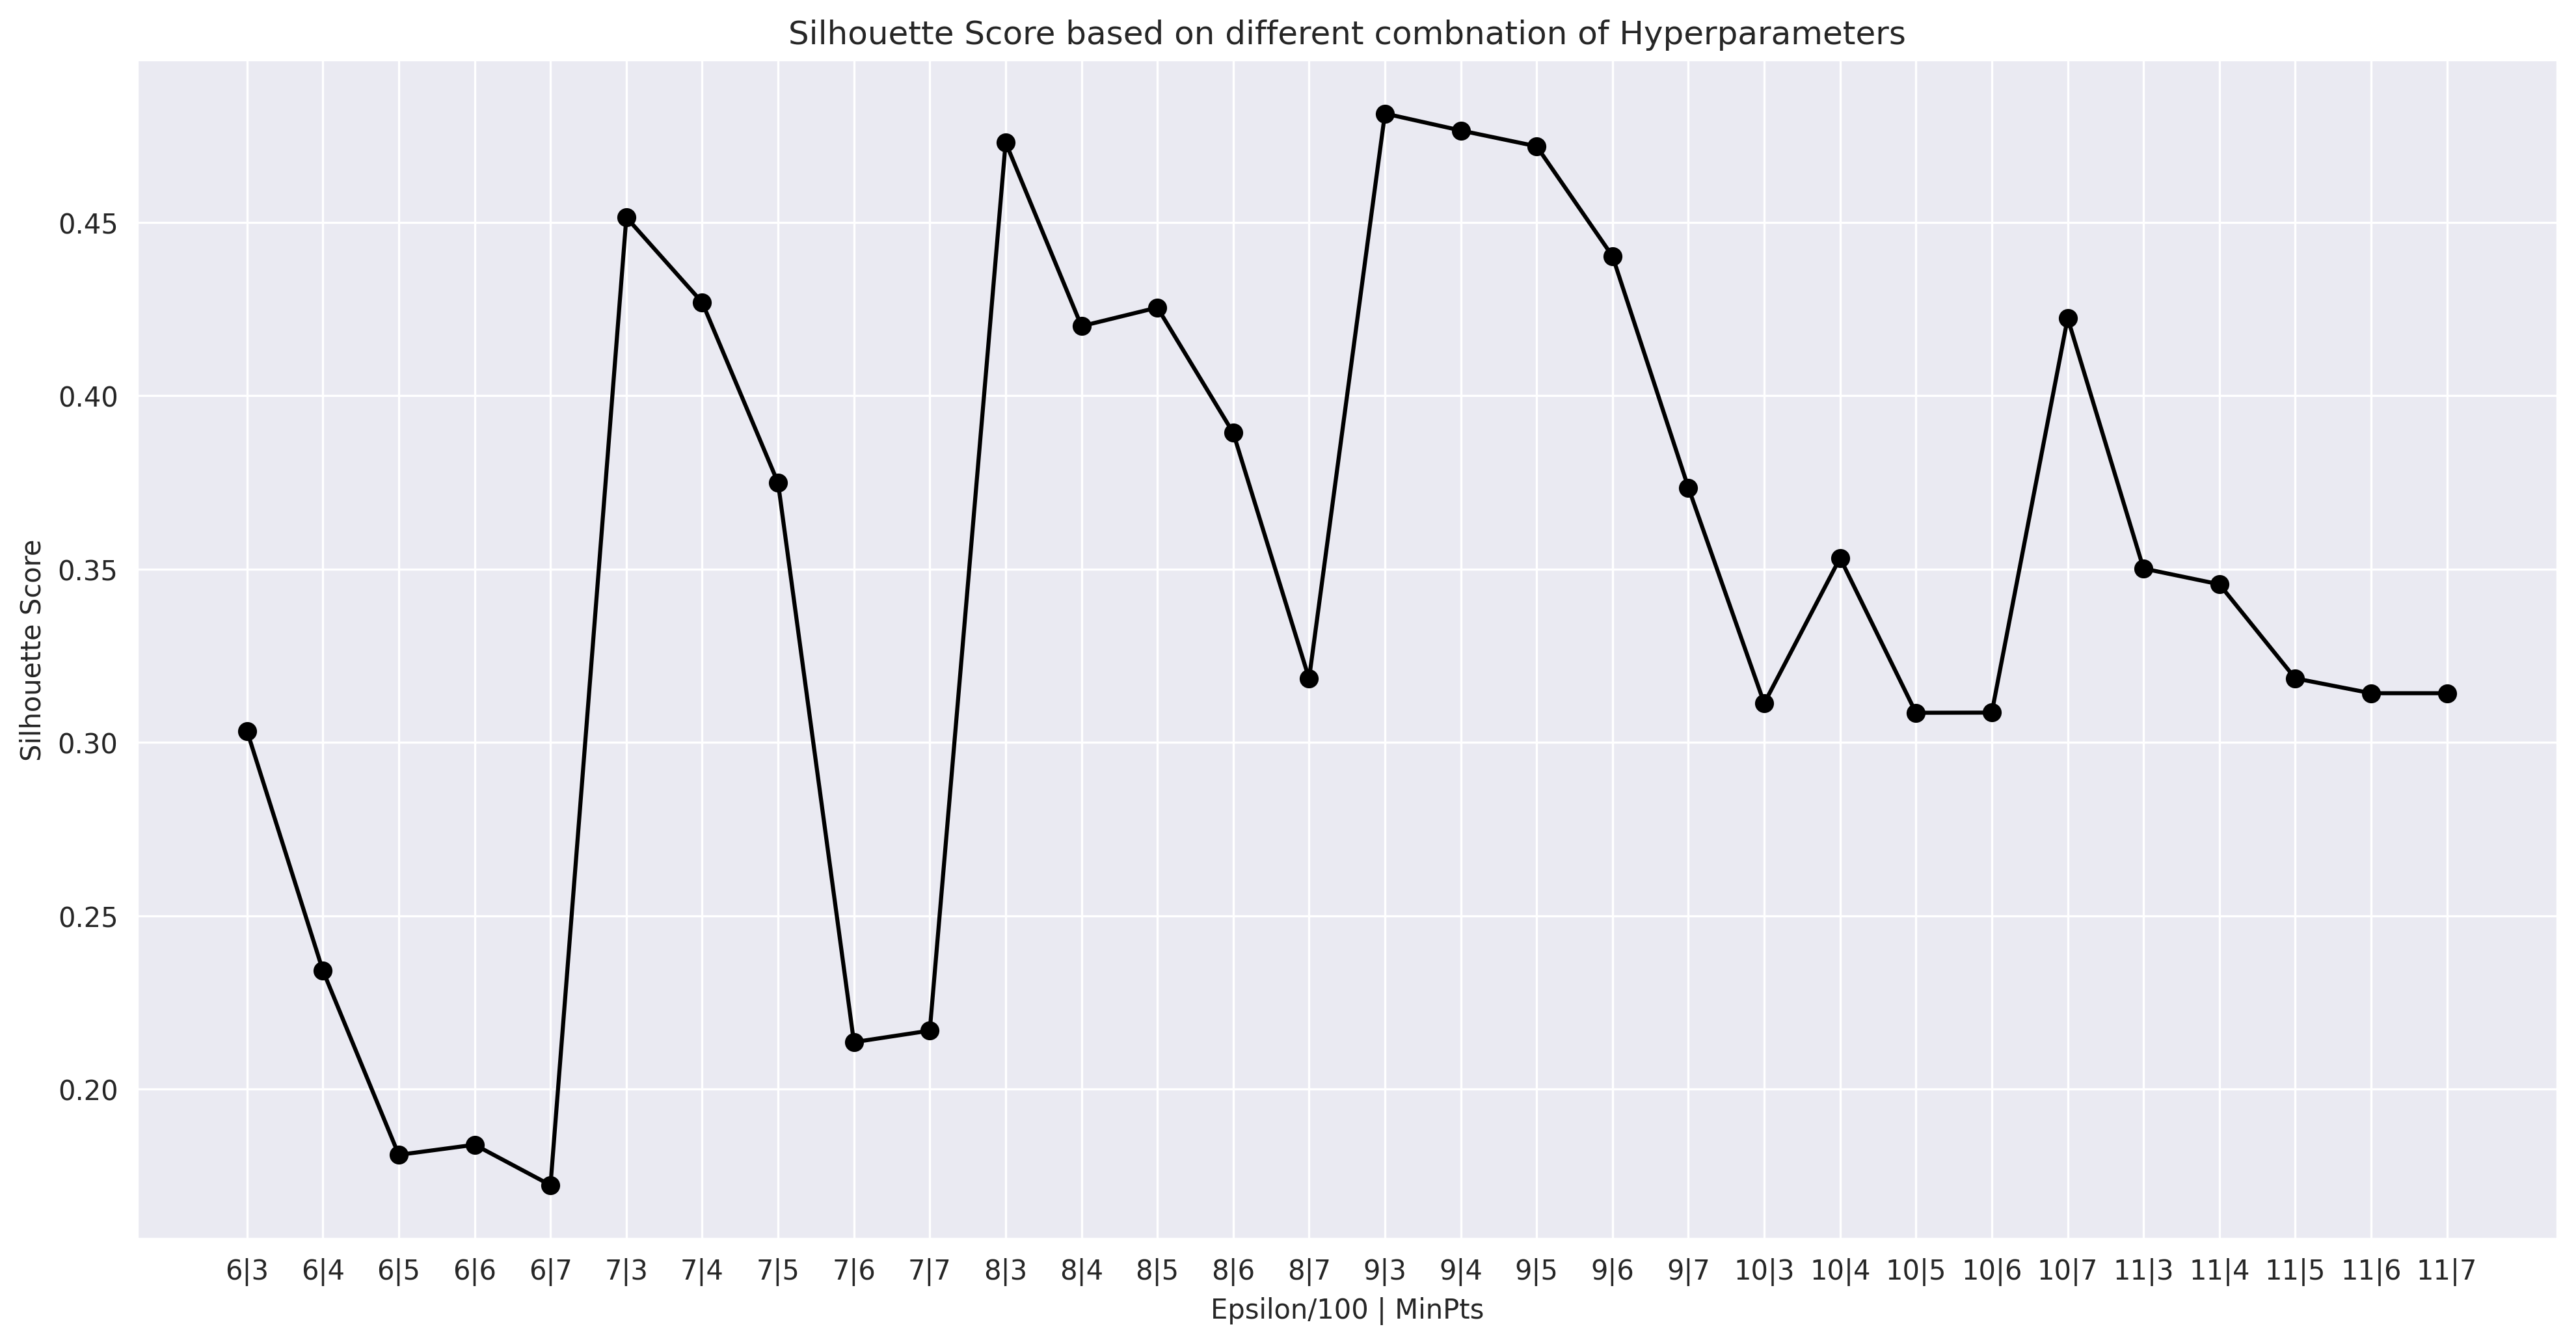

[0.3032915954359157, 0.23419607498038655, 0.18107898063068922, 0.18399687330428638, 0.1723439220896504, 0.4514229537856155, 0.4268959912664586, 0.3748553257235774, 0.21358033416842176, 0.21690473137446847, 0.4730365169240757, 0.42005758345270733, 0.4254140459250588, 0.38929684988095903, 0.3184021338019679, 0.4813688318721765, 0.47648030802443414, 0.4719187757907439, 0.4402284496325414, 0.37348685965060596, 0.3112927705650664, 0.3531939626304106, 0.30856140710670954, 0.3086117186144806, 0.42235418201628017, 0.35015753694754237, 0.3456149447106883, 0.31848769543983085, 0.3142024935728663, 0.3142024935728663]


In [ ]:
S=[] 
comb=[] 
# Define ranges to explore
eps_range=range(6,12) 
minpts_range=range(3,8)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        models = CustomDBSCAN()
        point_label, cluster = models.fit(Y_scaled, k/100,j)
        shilLevel = np.array(np.array(point_label))
        # Calculate Silhoutte Score and append to a list
        S.append( metrics.silhouette_score(Y_scaled,shilLevel,metric= 'euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph
%matplotlib inline
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()
print(S)

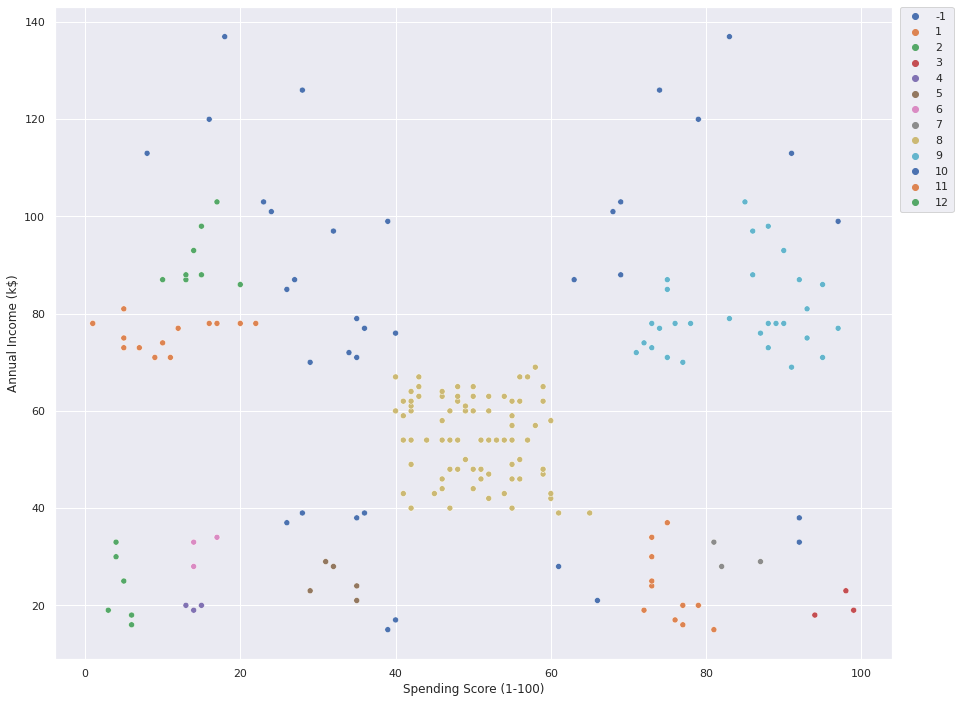

In [ ]:
models = CustomDBSCAN()
point_label, cluster = models.fit(Y_scaled, 0.06,3)
shilLevel = np.array(np.array(point_label))
df['custom_2DLevels_new'] = point_label

sns.set(rc={'figure.figsize':(15,12)})
sns.scatterplot(data=df,x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue = df['custom_2DLevels_new'] , palette="deep")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

In [ ]:
Y = df
scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y)

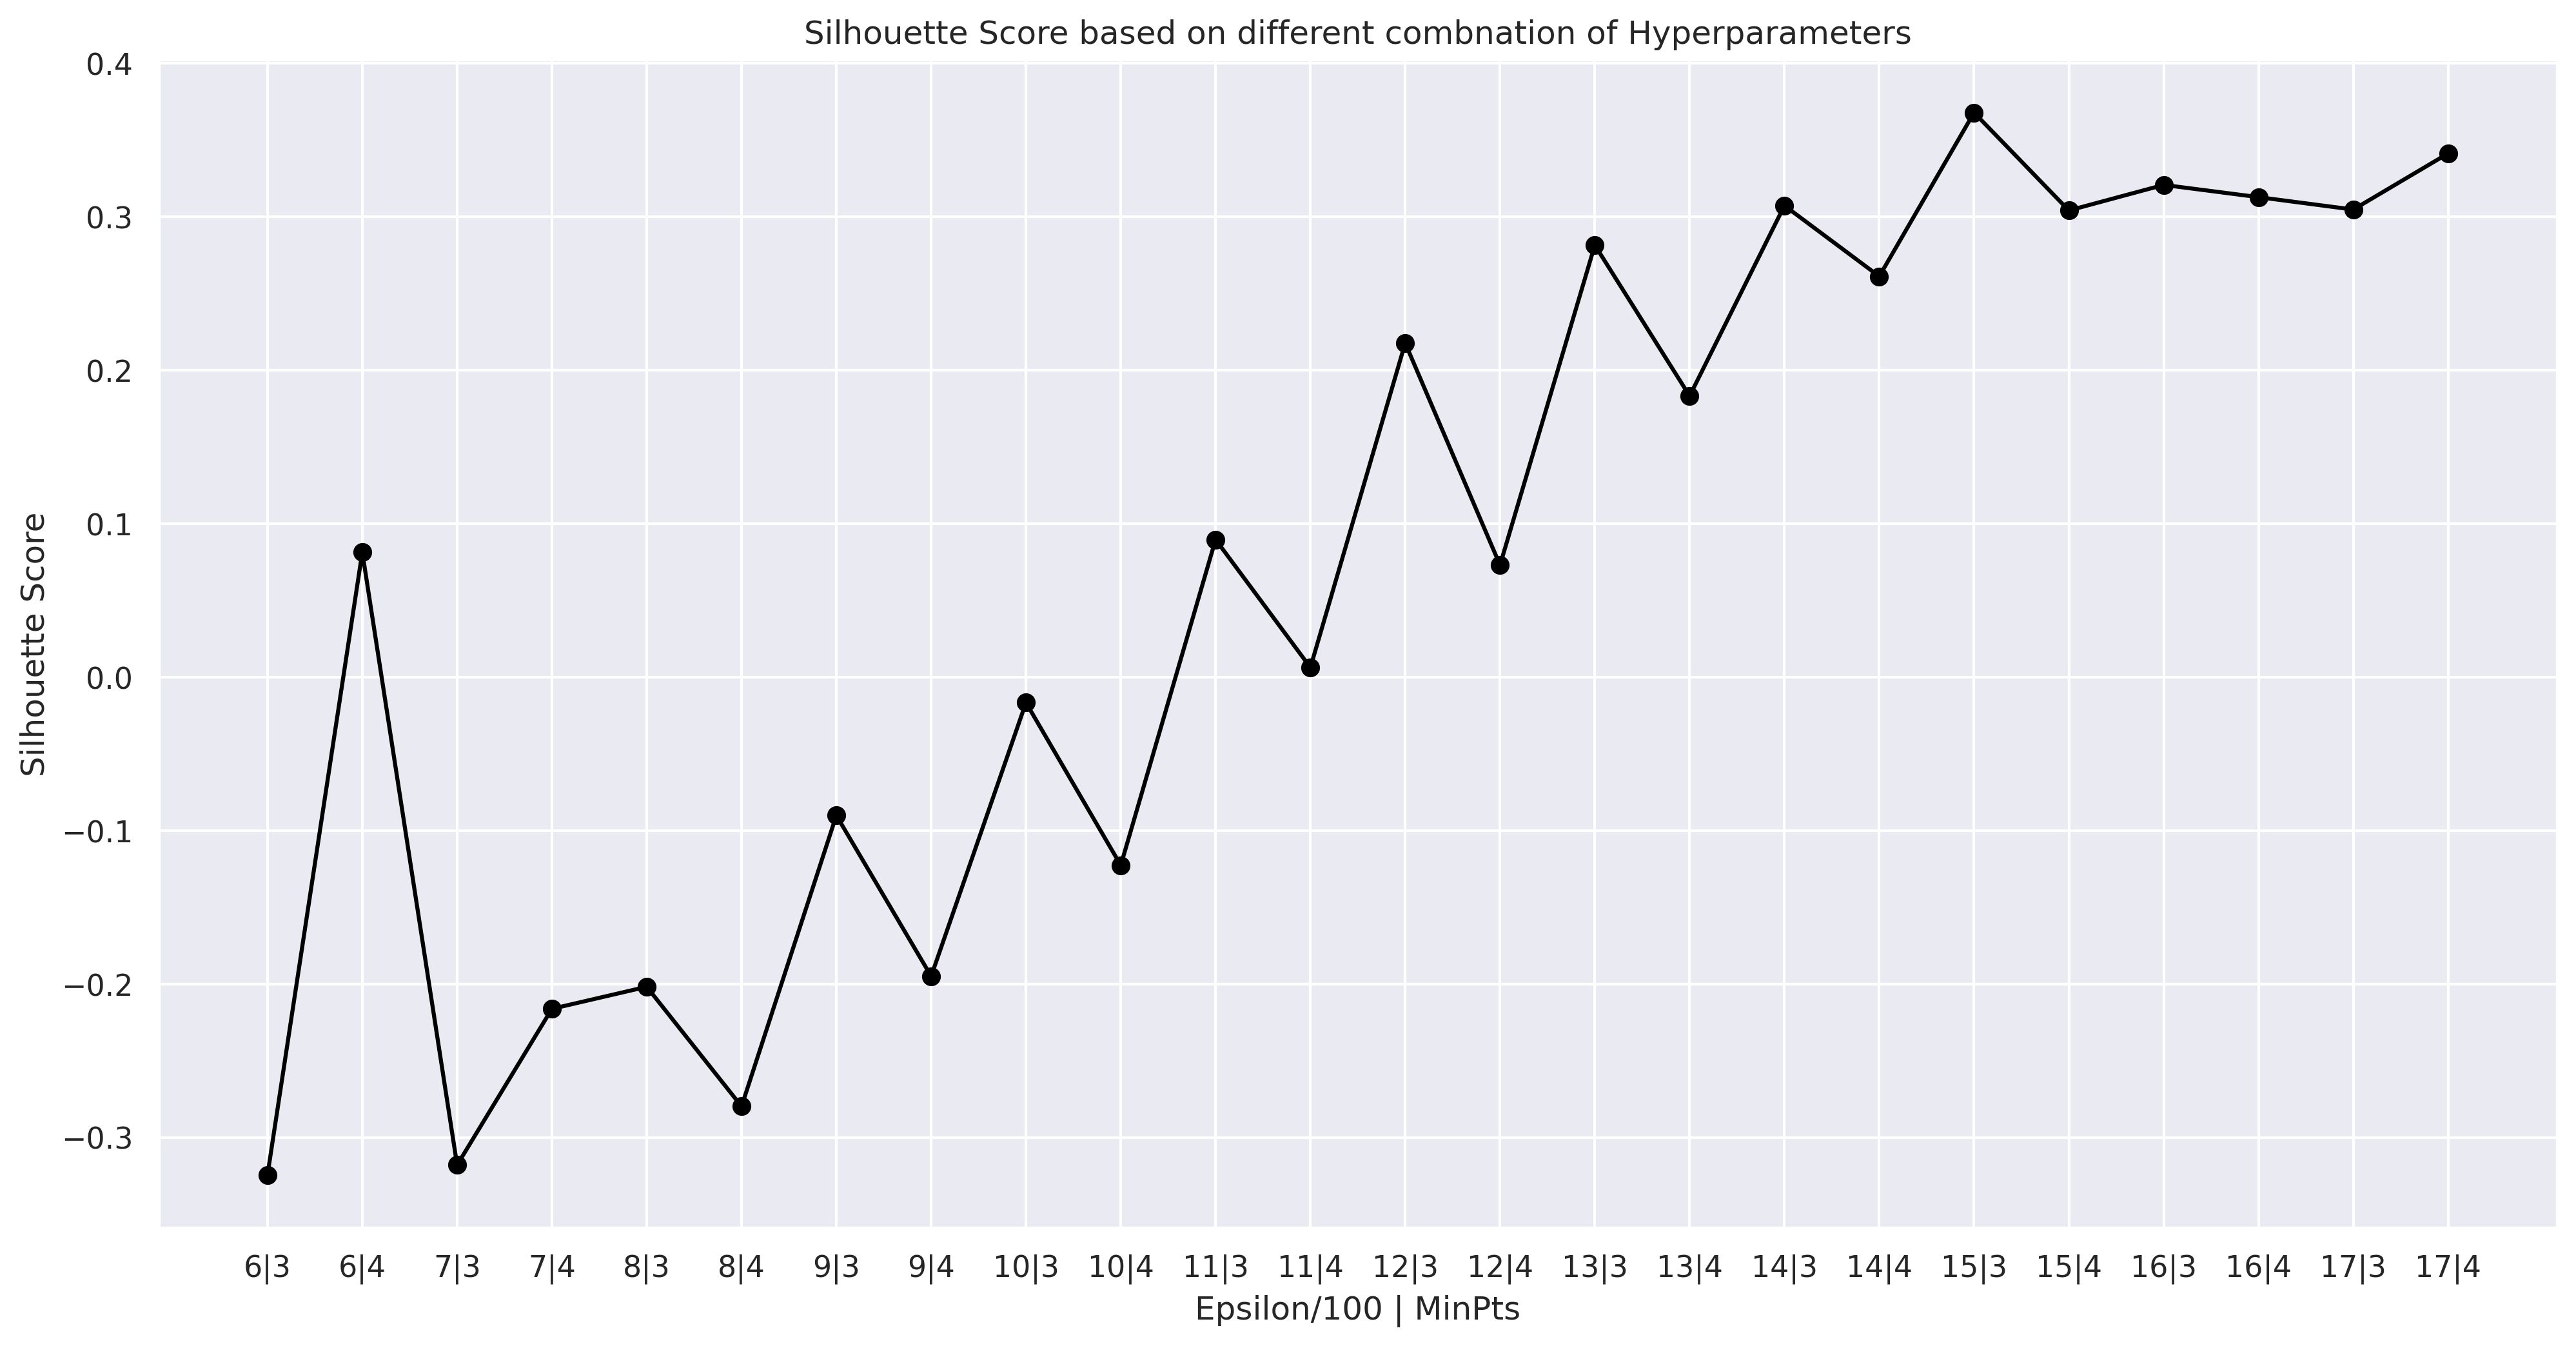

[-0.3244394250244862, 0.08139768313801962, -0.3179137385495935, -0.2161552627991047, -0.20179619058478487, -0.27971375028613826, -0.09013375283488509, -0.194903255874923, -0.016636316811281544, -0.12262881072582804, 0.08961127852344913, 0.006249814930182458, 0.2176431403244557, 0.07298533993078156, 0.28145183153787967, 0.18318640696712307, 0.3072122740984596, 0.26111431585641964, 0.3678133438456291, 0.30404466561163146, 0.3207065749120403, 0.3127334428946401, 0.3046433892479049, 0.34122961951969233]


In [ ]:
S=[] 
comb=[] 
# Define ranges to explore
eps_range=range(6,18) 
minpts_range=range(3,5)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        models = CustomDBSCAN()
        point_label, cluster = models.fit(Y_scaled, k/100,j)
        shilLevel = np.array(np.array(point_label))
        # Calculate Silhoutte Score and append to a list
        S.append( metrics.silhouette_score(Y_scaled,shilLevel,metric= 'euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph
%matplotlib inline
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()
print(S)

In [ ]:
df = df.drop(columns=['custom_levels', 'custom_2DLevels'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distribu

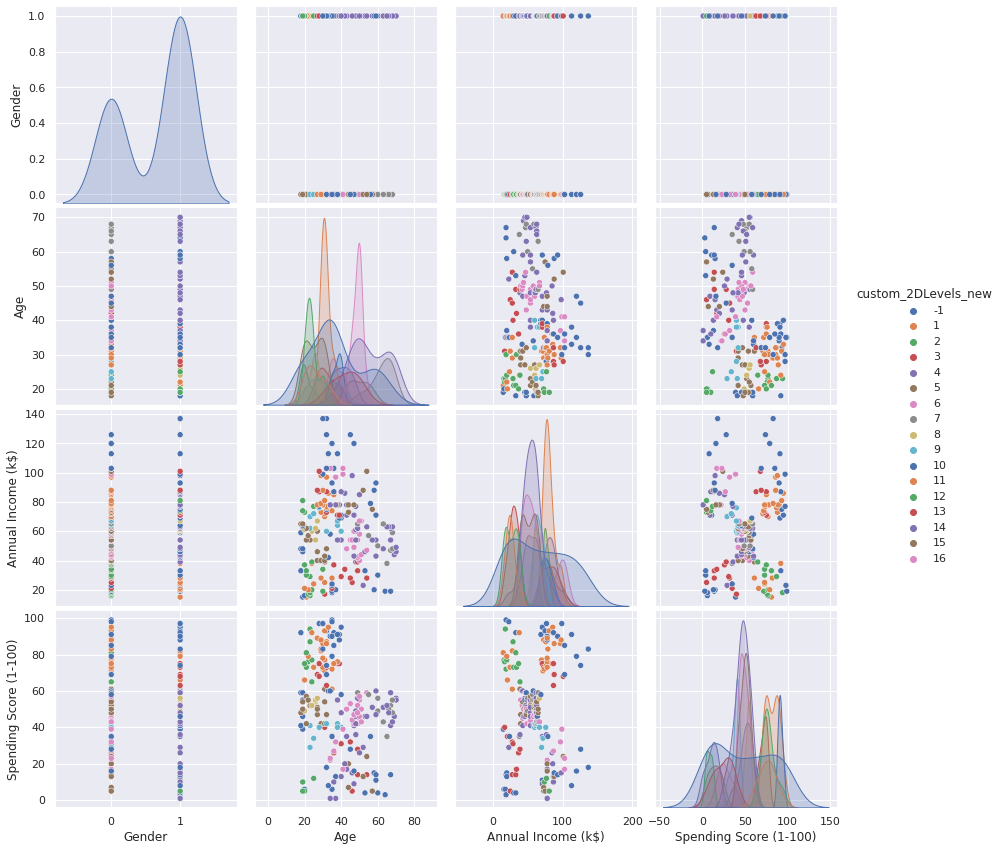

In [ ]:
models = CustomDBSCAN()
point_label, cluster = models.fit(Y_scaled, 0.17,4)
shilLevel = np.array(np.array(point_label))
df['custom_2DLevels_new'] = np.array(point_label)
#print(np.array(point_label))
sns.pairplot(df, vars= ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = 'custom_2DLevels_new', palette="deep",  height = 3)